In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Pabba Abhishek\Desktop\GRIP\SampleSuperstore-ML.csv")

In [3]:
df.head()

,Ship Mode,Segment,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit per sale
0,0,1,60610,1,2,143.128,2,0.8,-2.8
1,0,1,75701,1,2,2.688,3,0.8,-2.7
2,0,2,76106,1,2,24.588,3,0.8,-2.8
3,0,2,77506,1,2,1.624,2,0.8,-2.5
4,1,1,79605,1,2,1.392,2,0.8,-2.9


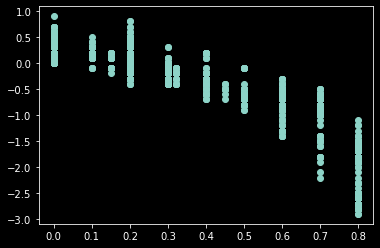

In [4]:
plt.style.use('dark_background')
plt.scatter(df['Discount'],df['Profit per sale'])

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Postal Code', 'Region', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit per sale'],
      dtype='object')

In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
x

array([[0.00000e+00, 1.00000e+00, 6.06100e+04, ..., 1.43128e+02,
        2.00000e+00, 8.00000e-01],
       [0.00000e+00, 1.00000e+00, 7.57010e+04, ..., 2.68800e+00,
        3.00000e+00, 8.00000e-01],
       [0.00000e+00, 2.00000e+00, 7.61060e+04, ..., 2.45880e+01,
        3.00000e+00, 8.00000e-01],
       ...,
       [0.00000e+00, 3.00000e+00, 9.37270e+04, ..., 1.19400e+01,
        3.00000e+00, 0.00000e+00],
       [0.00000e+00, 3.00000e+00, 9.41100e+04, ..., 1.95760e+02,
        4.00000e+00, 0.00000e+00],
       [0.00000e+00, 3.00000e+00, 9.41220e+04, ..., 5.00400e+01,
        6.00000e+00, 0.00000e+00]])

In [8]:
y

array([-2.8, -2.7, -2.8, ...,  0.6,  0.6,  0.5])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1940)

In [10]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(x, y)

RandomForestRegressor(random_state=0)

In [11]:
regr.score(x_test,y_test)

0.99112172237077

In [12]:
forecast=pd.read_csv(r"C:\Users\Pabba Abhishek\Desktop\GRIP\SampleSuperstore-ML-Forecast.csv")

In [13]:
forecast

,Ship Mode,Segment,Postal Code,Region,Sub-Category,Sales,Quantity,Discount
0,0,1,60610,1,2,143.128,2,0
1,0,1,75701,1,2,2.688,3,0
2,0,2,76106,1,2,24.588,3,0
3,0,2,77506,1,2,1.624,2,0
4,1,1,79605,1,2,1.392,2,0
...,...,...,...,...,...,...,...,...
9989,0,3,90045,4,13,146.820,3,0
9990,0,3,90049,4,11,44.400,3,0
9991,0,3,93727,4,13,11.940,3,0
9992,0,3,94110,4,13,195.760,4,0


In [14]:
y_pred = regr.predict(forecast)
y_pred

array([0.367, 0.429, 0.328, ..., 0.588, 0.569, 0.501])

In [15]:
forecast['Profit per sale']=y_pred

In [16]:
forecast

,Ship Mode,Segment,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit per sale
0,0,1,60610,1,2,143.128,2,0,0.367
1,0,1,75701,1,2,2.688,3,0,0.429
2,0,2,76106,1,2,24.588,3,0,0.328
3,0,2,77506,1,2,1.624,2,0,0.494
4,1,1,79605,1,2,1.392,2,0,0.459
...,...,...,...,...,...,...,...,...,...
9989,0,3,90045,4,13,146.820,3,0,0.500
9990,0,3,90049,4,11,44.400,3,0,0.502
9991,0,3,93727,4,13,11.940,3,0,0.588
9992,0,3,94110,4,13,195.760,4,0,0.569


In [17]:
forecast.to_csv(r"C:\Users\Pabba Abhishek\Desktop\GRIP\Forecast.csv")